<a href="https://colab.research.google.com/github/subaruosawa/network-analyze/blob/main/cluster_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install japanize-matplotlib

In [ ]:
import json
import datetime
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
from community import community_louvain
import community

In [ ]:
with open("/content/drive/My Drive/jaccard_fin.json") as f:
  jaccard = json.load(f)
with open("/content/drive/My Drive/flow_fin.json") as f:
  flow = json.load(f)
with open("/content/drive/My Drive/aId_3rd_finset.json") as f:
  aId = json.load(f)
with open("/content/drive/My Drive/mean.json") as f:
  mean = json.load(f)
with open("/content/drive/My Drive/entry.json") as f:
  entry = json.load(f)
with open("/content/drive/My Drive/liver_sex.json") as f:
  sex = json.load(f)
with open("/content/drive/My Drive/liver_debut.json") as f:
  debut_str = json.load(f)
with open("/content/drive/My Drive/real_name.json") as f:
  real_name = json.load(f)

In [ ]:
debut = []
for i in debut_str:
  debut.append(datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9))).date()
   - datetime.datetime.strptime(i,'%Y-%m-%d').date())

In [ ]:
with open("/content/drive/My Drive/real_name.json") as f:
  name_alpha = json.load(f)
with open("/content/drive/My Drive/real_name.json") as f:
  name_beta = json.load(f)

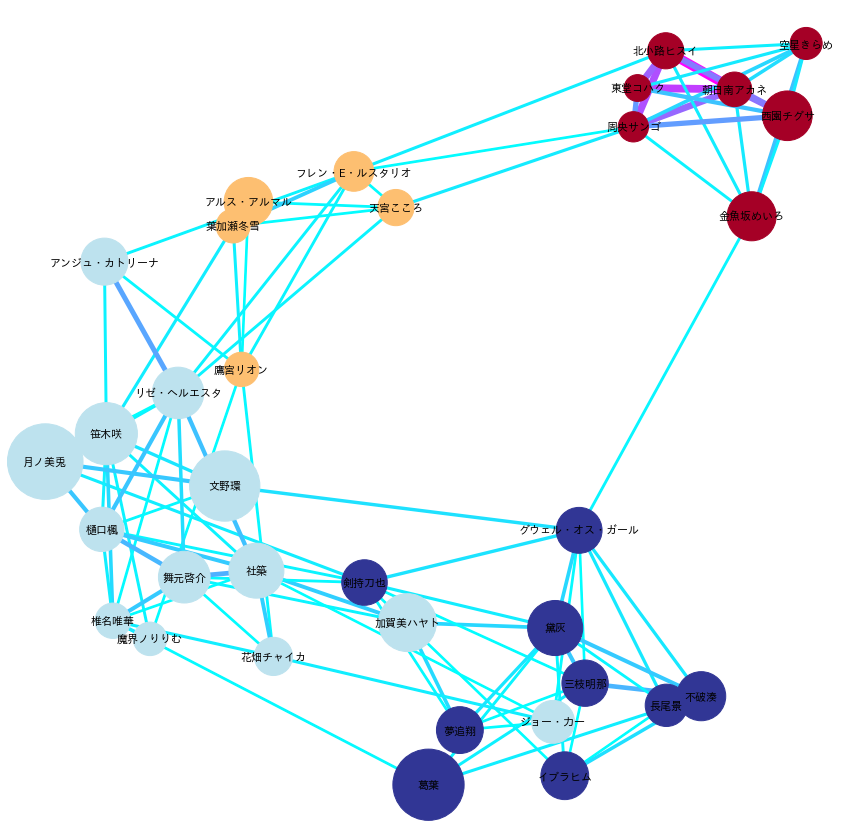

In [ ]:
G = nx.Graph()

for i in range(106):
  G.add_node(real_name[i],
             count = len(aId[i]),
             sex = sex[i],
             debut = debut[i],
             name = real_name[i])

n = 0
del name_alpha[-1]
del name_beta[0]
for alpha in name_alpha:
  for beta in name_beta:
    if not jaccard[3][n] == 0: 
      G.add_edge(alpha,beta,weight = jaccard[3][n])
    n += 1
  del name_beta[0]

#オプション：デビュー時期
#for n,d in list(G.nodes(data=True)):
  #if d["sex"] == "man":
    #G.remove_node(n)

#オプション：性別
#for n,d in list(G.nodes(data=True)):
  #if d["debut"] >= datetime.timedelta(365):
    #G.remove_node(n)

for u,v,d in list(G.edges(data=True)):
  if d["weight"] <= 0.026:
    G.remove_edge(u,v)

for name,deg in list(G.degree):
  if deg <= 3:
    G.remove_node(name)

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.2)
deg = nx.degree_centrality(G).values()
partition=community.best_partition(G)
nx.draw_networkx(G, pos, with_labels=True,font_family="IPAexGothic",font_size=11)
cliques = nx.find_cliques(G)

node_size = [ d["count"]**1.1 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_size=node_size,
                       #node_color=list(deg),
                       node_color=list(partition.values()),
                       cmap=plt.cm.RdYlBu
                       )  
edge_width = [ d['weight']*100 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edge_color=edge_width, width=edge_width, edge_cmap=plt.cm.cool)

plt.axis('off')
plt.show()

In [ ]:
print("クラスター数:"+str(max(partition.values())+1))
print("各ライバーの所属クラスター:"+str(partition))

クラスター数:4
各ライバーの所属クラスター:{'朝日南アカネ': 0, '天宮こころ': 1, 'アルス・アルマル': 1, 'アンジュ・カトリーナ': 2, 'イブラヒム': 3, '加賀美ハヤト': 2, '北小路ヒスイ': 0, '金魚坂めいろ': 0, '葛葉': 3, 'グウェル・オス・ガール': 3, '剣持刀也': 3, '三枝明那': 3, '笹木咲': 2, '椎名唯華': 2, 'ジョー・力一': 2, '周央サンゴ': 0, '空星きらめ': 0, '鷹宮リオン': 1, '月ノ美兎': 2, '東堂コハク': 0, '長尾景': 3, '西園チグサ': 0, '葉加瀬冬雪': 1, '花畑チャイカ': 2, '樋口楓': 2, '文野環': 2, 'フレン・E・ルスタリオ': 1, '不破湊': 3, '舞元啓介': 2, '魔界ノりりむ': 2, '黛灰': 3, '社築': 2, '夢追翔': 3, 'リゼ・ヘルエスタ': 2}


In [ ]:
cluster0_name=[]; cluster1_name=[]; cluster2_name=[]; cluster3_name=[]; cluster4_name=[];
cluster_name = [cluster0_name,cluster1_name,cluster2_name,cluster3_name, cluster4_name]
for k,v in partition.items():
  if v == 0:
    cluster0_name.append(k)
  elif v == 1:
    cluster1_name.append(k)
  elif v == 2:
    cluster2_name.append(k)
  elif v == 3:
    cluster3_name.append(k)
  elif v == 4:
    cluster4_name.append(k)

for clu in cluster_name:
  for i in clu:
    print(i)
  print("■■■■■■■■■■■■■■■")

朝日南アカネ
北小路ヒスイ
金魚坂めいろ
周央サンゴ
空星きらめ
東堂コハク
西園チグサ
■■■■■■■■■■■■■■■
天宮こころ
アルス・アルマル
鷹宮リオン
葉加瀬冬雪
フレン・E・ルスタリオ
■■■■■■■■■■■■■■■
アンジュ・カトリーナ
加賀美ハヤト
笹木咲
椎名唯華
ジョー・力一
月ノ美兎
花畑チャイカ
樋口楓
文野環
舞元啓介
魔界ノりりむ
社築
リゼ・ヘルエスタ
■■■■■■■■■■■■■■■
イブラヒム
葛葉
グウェル・オス・ガール
剣持刀也
三枝明那
長尾景
不破湊
黛灰
夢追翔
■■■■■■■■■■■■■■■
■■■■■■■■■■■■■■■


In [ ]:
aId_count = []
for n in range(106):
  aId_count.append(len(aId[n]))
name_lenaId = {}
name_lenaId.update(zip(real_name,aId_count))

node_name = []
for i in G.nodes:
  node_name.append(i)
node_aId = []
for nn in node_name:
  node_aId.append(name_lenaId[nn])
node_lenaId = {}
node_lenaId.update(zip(node_name,node_aId))

cluster0_aId=[]; cluster1_aId=[]; cluster2_aId=[]; cluster3_aId=[]; cluster4_aId=[];
cluster_aId = [cluster0_aId,cluster1_aId,cluster2_aId,cluster3_aId,cluster4_aId]
for k,v in partition.items():
  if v == 0:
    cluster0_aId.append(node_lenaId[k])
  elif v == 1:
    cluster1_aId.append(node_lenaId[k])
  elif v == 2:
    cluster2_aId.append(node_lenaId[k])
  elif v == 3:
    cluster3_aId.append(node_lenaId[k])
  elif v == 4:
    cluster4_aId.append(node_lenaId[k])

all_aId = (sum(cluster0_aId)+sum(cluster1_aId)+sum(cluster2_aId)+sum(cluster3_aId))
print(sum(cluster0_aId)+sum(cluster1_aId)+sum(cluster2_aId)+sum(cluster3_aId))

for i in cluster_aId:
  print(sum(i))
  print(sum(i)/all_aId*100)
  print("■■■■■■■■■■■■■■■")



37682
5141
13.643118730428322
■■■■■■■■■■■■■■■
3887
10.315269890133221
■■■■■■■■■■■■■■■
17385
46.13608619500027
■■■■■■■■■■■■■■■
11269
29.905525184438194
■■■■■■■■■■■■■■■
0
0.0
■■■■■■■■■■■■■■■


In [ ]:
with open("/content/drive/My Drive/real_name.json") as f:
  name_alpha = json.load(f)
with open("/content/drive/My Drive/real_name.json") as f:
  name_beta = json.load(f)

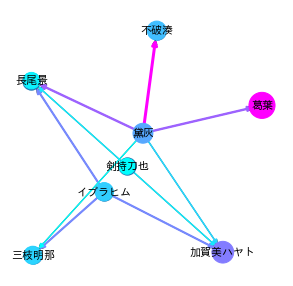

In [ ]:
#ファンの流出入を調べる
DG = nx.DiGraph()

for i in range(106):
  DG.add_node(name_alpha[i],
             count = len(entry[2][i]),
             sex = sex[i],
             debut = debut[i],
             name = real_name[i])
  
n = 0
del name_alpha[-1]
del name_beta[0]
for alpha in name_alpha:
  for beta in name_beta:
    if flow[2][n] > 0:
      DG.add_edge(alpha,beta,weight = flow[2][n])
    elif flow[2][n] < 0:
      DG.add_edge(beta,alpha,weight = -flow[2][n])            
    n += 1
  del name_beta[0]

cluster_n = []
for k,v in partition.items():
  if v == 2:#クラスターの数字
    cluster_n.append(k)
for u,v in list(DG.edges):
  if not u in cluster_n:
    DG.remove_edge(u,v)
  elif not v in cluster_n:
    DG.remove_edge(u,v)

for u,v in list(DG.edges):
  if u == "夢追翔":
    DG.remove_edge(u,v)
  elif v == "夢追翔":
    DG.remove_edge(u,v)

for u,v in list(DG.edges):
  if u == "グウェル・オス・ガール":
    DG.remove_edge(u,v)
  elif v == "グウェル・オス・ガール":
    DG.remove_edge(u,v)

for u,v in list(DG.edges):
  if u == "文野環":
    DG.remove_edge(u,v)
  elif v == "文野環":
    DG.remove_edge(u,v)


for u,v,d in list(DG.edges(data=True)):
  if d["weight"] <= 10:
    DG.remove_edge(u,v)

for name,deg in list(DG.degree):
  if deg <= 0:
    DG.remove_node(name)

################################################################################
plt.figure(figsize=(5,5))
pos = nx.spring_layout(DG, k=0.2)
deg = nx.degree_centrality(DG).values()
nx.draw_networkx(DG, pos, with_labels=True,font_family="IPAexGothic",font_size=11)

node_size = [ d["count"]/1.5 for (n,d) in DG.nodes(data=True)]
nx.draw_networkx_nodes(DG, pos, node_size=node_size, node_color=node_size, cmap=plt.cm.cool)
edge_width = [ d['weight']/8 for (u,v,d) in DG.edges(data=True)]
nx.draw_networkx_edges(DG, pos,edge_color=edge_width, width=edge_width, edge_cmap=plt.cm.cool)

plt.axis('off')
plt.show()